In [1]:
import requests

all_products = []

for page in range(1, 125):
    url = f"https://world.openfoodfacts.org/api/v2/search?categories=chocolates&fields=code,product_name,brands,nutriments&page_size=100&page={page}"
   
    response = requests.get(url)

    if response.status_code != 200:
        continue

    try:
        data = response.json()
    except ValueError: 
        continue

    all_products.extend(data.get('products', []))


In [2]:
data.keys()

dict_keys(['count', 'page', 'page_count', 'page_size', 'products', 'skip'])

In [3]:
data['products']

[{'brands': 'Kerry Foods',
  'code': '5000187120862',
  'nutriments': {'carbohydrates': 0.6,
   'carbohydrates_100g': 0.6,
   'carbohydrates_unit': 'g',
   'carbohydrates_value': 0.6,
   'energy': 2079,
   'energy-kcal': 497,
   'energy-kcal_100g': 497,
   'energy-kcal_unit': 'kcal',
   'energy-kcal_value': 497,
   'energy-kcal_value_computed': 499.4,
   'energy_100g': 2079,
   'energy_unit': 'kcal',
   'energy_value': 497,
   'fat': 55,
   'fat_100g': 55,
   'fat_unit': 'g',
   'fat_value': 55,
   'fruits-vegetables-legumes-estimate-from-ingredients_100g': 16,
   'fruits-vegetables-legumes-estimate-from-ingredients_serving': 16,
   'fruits-vegetables-nuts-estimate-from-ingredients_100g': 74.125,
   'fruits-vegetables-nuts-estimate-from-ingredients_serving': 74.125,
   'nova-group': 4,
   'nova-group_100g': 4,
   'nova-group_serving': 4,
   'nutrition-score-fr': 12,
   'nutrition-score-fr_100g': 12,
   'proteins': 0.5,
   'proteins_100g': 0.5,
   'proteins_unit': 'g',
   'proteins_valu

In [4]:
import pandas as pd 

In [5]:
df = pd.DataFrame(all_products)
df

,brands,code,nutriments,product_name
0,Sidi Ali,6111035000430,"{'carbohydrates': 42, 'carbohydrates_100g': 4....",Sidi Ali
1,perly,6111242100992,"{'calcium': 0.25, 'calcium_100g': 0.25, 'calci...",perly
2,sidi ali,6111035002175,"{'chloride': 0.014, 'chloride_100g': 0.014, 'c...",Sidi Ali
3,"Les Eaux Minérales d'oulmès,Sidi Ali",6111035000058,{'fruits-vegetables-legumes-estimate-from-ingr...,Eau minérale naturelle
4,AQUAFINA,6111252421568,"{'alcohol': 0, 'alcohol_100g': 0, 'alcohol_ser...",اكوافينا
...,...,...,...,...
12392,Rigoni di Asiago,8052575090179,"{'carbohydrates': 55, 'carbohydrates_100g': 55...",Nocciolata
12393,Cawston Press,5060054134323,"{'carbohydrates': 4.3, 'carbohydrates_100g': 4...",Elderflower Lemonade
12394,Fage,5201054017036,"{'carbohydrates': 3, 'carbohydrates_100g': 3, ...",Yoghurt 5% fat
12395,Quorn,5019503006018,"{'carbohydrates': 1, 'carbohydrates_100g': 1.9...",Fillets


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12397 entries, 0 to 12396
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brands        11852 non-null  object
 1   code          12397 non-null  object
 2   nutriments    12397 non-null  object
 3   product_name  12139 non-null  object
dtypes: object(4)
memory usage: 387.5+ KB
None


In [7]:
len(df)

12397

In [8]:
df1 = pd.json_normalize(df["nutriments"])

In [9]:
df1.head()

,carbohydrates,carbohydrates_100g,carbohydrates_serving,carbohydrates_unit,carbohydrates_value,energy,energy-kcal,energy-kcal_100g,energy-kcal_serving,energy-kcal_unit,...,glucose,glucose_100g,glucose_serving,glucose_unit,glucose_value,nucleotides,nucleotides_100g,nucleotides_serving,nucleotides_unit,nucleotides_value
0,42.0,4.2,42.0,g,42.0,20.0,0.0,0.0,0.0,kcal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9.4,9.4,9.4,g,9.4,406.0,97.0,97.0,97.0,kcal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,g,0.0,0.0,0.0,0.0,0.0,kcal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# select required columns
nutriment_fields = [
    'energy-kcal_value', 'energy-kj_value', 'carbohydrates_value', 'sugars_value','fat_value', 'saturated-fat_value', 'proteins_value', 'fiber_value', 'salt_value','sodium_value', 'nova-group', 'nutrition-score-fr','fruits-vegetables-nuts-estimate-from-ingredients_100g'
]

df1 = df1[nutriment_fields]

In [11]:
print(df1.head(10))

   energy-kcal_value  energy-kj_value  carbohydrates_value  sugars_value  \
0                0.0             20.0                 42.0          14.0   
1               97.0            406.0                  9.4           NaN   
2                NaN              NaN                  NaN           NaN   
3                NaN              NaN                  NaN           NaN   
4                0.0              0.0                  0.0           0.0   
5               45.0            188.0                  4.9           0.0   
6                0.0              0.0                  0.0           0.0   
7               80.6            337.0                  6.1           0.0   
8               58.0              NaN                  4.8           0.0   
9              235.0            984.0                  3.5           0.0   

   fat_value  saturated-fat_value  proteins_value  fiber_value  salt_value  \
0        0.0                  0.0             0.0          0.0     0.00000   
1      

In [12]:
df1.columns = df1.columns.str.strip()
print(df1.columns.to_list())

['energy-kcal_value', 'energy-kj_value', 'carbohydrates_value', 'sugars_value', 'fat_value', 'saturated-fat_value', 'proteins_value', 'fiber_value', 'salt_value', 'sodium_value', 'nova-group', 'nutrition-score-fr', 'fruits-vegetables-nuts-estimate-from-ingredients_100g']


In [13]:
# concatinate the df and df1
finaldf = pd.concat([df[['code', 'product_name', 'brands']], df1], axis=1)
finaldf.drop('nutriments', axis=1, inplace=True, errors='ignore')  # clean leftover column
print(finaldf.head())

            code            product_name  \
0  6111035000430                Sidi Ali   
1  6111242100992                   perly   
2  6111035002175                Sidi Ali   
3  6111035000058  Eau minérale naturelle   
4  6111252421568                اكوافينا   

                                 brands  energy-kcal_value  energy-kj_value  \
0                              Sidi Ali                0.0             20.0   
1                                 perly               97.0            406.0   
2                              sidi ali                NaN              NaN   
3  Les Eaux Minérales d'oulmès,Sidi Ali                NaN              NaN   
4                              AQUAFINA                0.0              0.0   

   carbohydrates_value  sugars_value  fat_value  saturated-fat_value  \
0                 42.0          14.0        0.0                  0.0   
1                  9.4           NaN        3.0                  NaN   
2                  NaN           NaN        

In [14]:
finaldf.isnull().sum()

code                                                        0
product_name                                              258
brands                                                    545
energy-kcal_value                                         782
energy-kj_value                                          5774
carbohydrates_value                                       785
sugars_value                                              974
fat_value                                                 749
saturated-fat_value                                      1022
proteins_value                                            761
fiber_value                                              3872
salt_value                                               1030
sodium_value                                             1030
nova-group                                               1273
nutrition-score-fr                                       1650
fruits-vegetables-nuts-estimate-from-ingredients_100g     712
dtype: i

In [15]:
nutriment_cols = [ 'energy-kj_value', 'fiber_value', 'nutrition-score-fr', 'nova-group',
    'saturated-fat_value', 'salt_value', 'sodium_value', 'sugars_value', 'carbohydrates_value',
    'energy-kcal_value', 'fruits-vegetables-nuts-estimate-from-ingredients_100g', 'proteins_value', 'fat_value']
for col in nutriment_cols:
    finaldf[col] = finaldf[col].fillna(finaldf[col].mean())

In [16]:
print("Before:", df.shape)
finaldf.dropna(inplace=True)
print("After:", finaldf.shape)

Before: (12397, 4)
After: (11803, 16)


In [17]:
finaldf.isnull().sum()

code                                                     0
product_name                                             0
brands                                                   0
energy-kcal_value                                        0
energy-kj_value                                          0
carbohydrates_value                                      0
sugars_value                                             0
fat_value                                                0
saturated-fat_value                                      0
proteins_value                                           0
fiber_value                                              0
salt_value                                               0
sodium_value                                             0
nova-group                                               0
nutrition-score-fr                                       0
fruits-vegetables-nuts-estimate-from-ingredients_100g    0
dtype: int64

In [18]:
finaldf.isnull().values.any()

np.False_

In [19]:
# feature engineering

In [20]:
# sugar_to_carb_ratio 
finaldf['sugartocarbratio'] = finaldf['sugars_value'] / finaldf['carbohydrates_value']

# calorie_category
def classifycalorie(cal):
    if cal >= 500:
        return "High Calorie"
    elif cal >= 300:
        return "Moderate Calorie"
    else:
        return "Low Calorie"

finaldf['caloriecategory'] = finaldf['energy-kcal_value'].apply(classifycalorie)

# sugar_category
def classifysugar(sugar):
    if sugar >= 25: return "High Sugar"
    elif sugar >= 10: return "Moderate Sugar"
    else: return "Low Sugar"
finaldf['sugarcategory'] = finaldf['sugars_value'].apply(classifysugar)

# is_ultra_processed
finaldf['isultraprocessed'] = finaldf['nova-group'].apply(lambda x: "Yes" if x == 4 else "No")


In [21]:
finaldf.isnull().sum()

code                                                       0
product_name                                               0
brands                                                     0
energy-kcal_value                                          0
energy-kj_value                                            0
carbohydrates_value                                        0
sugars_value                                               0
fat_value                                                  0
saturated-fat_value                                        0
proteins_value                                             0
fiber_value                                                0
salt_value                                                 0
sodium_value                                               0
nova-group                                                 0
nutrition-score-fr                                         0
fruits-vegetables-nuts-estimate-from-ingredients_100g      0
sugartocarbratio        

In [22]:
finaldf['sugartocarbratio'] = finaldf['sugartocarbratio'].fillna(finaldf['sugartocarbratio'].mean())
finaldf.isnull().sum()

code                                                     0
product_name                                             0
brands                                                   0
energy-kcal_value                                        0
energy-kj_value                                          0
carbohydrates_value                                      0
sugars_value                                             0
fat_value                                                0
saturated-fat_value                                      0
proteins_value                                           0
fiber_value                                              0
salt_value                                               0
sodium_value                                             0
nova-group                                               0
nutrition-score-fr                                       0
fruits-vegetables-nuts-estimate-from-ingredients_100g    0
sugartocarbratio                                        

In [23]:
finaldf.to_csv('chocodata.csv', index=False)

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

In [25]:
print("Shape (rows x columns):", finaldf.shape)
print("Columns:", finaldf.columns.tolist())
print("Basic Info:")
print(finaldf.info())
print("\nOverview:")
print(finaldf.head())

Shape (rows x columns): (11803, 20)
Columns: ['code', 'product_name', 'brands', 'energy-kcal_value', 'energy-kj_value', 'carbohydrates_value', 'sugars_value', 'fat_value', 'saturated-fat_value', 'proteins_value', 'fiber_value', 'salt_value', 'sodium_value', 'nova-group', 'nutrition-score-fr', 'fruits-vegetables-nuts-estimate-from-ingredients_100g', 'sugartocarbratio', 'caloriecategory', 'sugarcategory', 'isultraprocessed']
Basic Info:
<class 'pandas.core.frame.DataFrame'>
Index: 11803 entries, 0 to 12396
Data columns (total 20 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   code                                                   11803 non-null  object 
 1   product_name                                           11803 non-null  object 
 2   brands                                                 11803 non-null  object 
 3   energy-kcal_value               

In [26]:
# null values per column 
print("\nMissing value per column")
null_count = finaldf.isnull().sum()
print(null_count)
print("\n % Missing value per column")
print((null_count / len(finaldf)*100).sort_values(ascending=False))


Missing value per column
code                                                     0
product_name                                             0
brands                                                   0
energy-kcal_value                                        0
energy-kj_value                                          0
carbohydrates_value                                      0
sugars_value                                             0
fat_value                                                0
saturated-fat_value                                      0
proteins_value                                           0
fiber_value                                              0
salt_value                                               0
sodium_value                                             0
nova-group                                               0
nutrition-score-fr                                       0
fruits-vegetables-nuts-estimate-from-ingredients_100g    0
sugartocarbratio              

In [27]:
# description of columns
print("\n descriptive columns")
finaldf.describe()


 descriptive columns


C:\Users\mukul\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,energy-kcal_value,energy-kj_value,carbohydrates_value,sugars_value,fat_value,saturated-fat_value,proteins_value,fiber_value,salt_value,sodium_value,nova-group,nutrition-score-fr,fruits-vegetables-nuts-estimate-from-ingredients_100g,sugartocarbratio
count,11803.000000,11803.000000,11803.000000,11803.000000,11803.000000,11803.000000,11803.000000,1.180300e+04,11803.000000,11803.000000,11803.000000,11803.000000,11803.000000,1.180300e+04
mean,277.742210,1217.400425,28.464211,11.294880,14.626567,5.033768,7.234880,7.229348e+08,15.874370,6.349748,3.293882,8.858403,18.373636,inf
std,466.720227,631.291671,39.974597,16.941908,36.564336,9.286098,28.427579,5.625044e+10,799.445692,319.778277,0.978363,9.194083,30.318264,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,-17.000000,-0.066406,0.000000e+00
25%,95.000000,1026.000000,4.800000,1.100000,1.300000,0.300000,1.500000,1.100000e+00,0.060000,0.024000,3.000000,2.000000,0.000000,1.250000e-01
50%,252.000000,1217.014911,17.000000,4.400000,6.900000,1.700000,5.900000,4.600000e+00,0.442500,0.177000,4.000000,8.908440,0.656250,5.000000e-01
75%,421.000000,1406.500000,53.050000,12.000000,20.000000,5.300000,9.150000,7.168612e+08,1.100000,0.440000,4.000000,15.000000,20.416299,9.629630e-01
max,45793.499044,3768.000000,3260.000000,395.000000,3400.000000,400.000000,3000.000000,6.111242e+12,85000.000000,34000.000000,4.000000,49.000000,197.200000,inf


In [28]:
# main numeric distributions

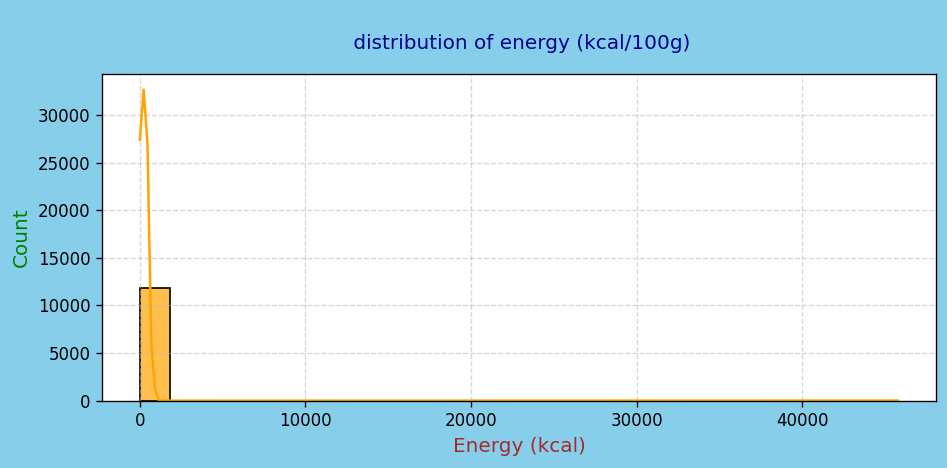

In [29]:
plt.figure(figsize=(8,4),facecolor = 'skyblue',dpi=120, tight_layout = True)
sns.histplot(
    data=finaldf,
    x='energy-kcal_value',
    bins=25,
    color='orange',
    kde=True,
    #hue='brands',
    #multiple='dodge',        #  try 'dodge', 'fill', 'layer'
    edgecolor='black',
    alpha=0.7,
    stat='count',            #  try 'density', 'probability'
    element='bars'           #  try 'step', 'poly'
)
plt.title("\n distribution of energy (kcal/100g)",color = 'darkblue', pad = 15)
plt.xlabel("Energy (kcal)", fontsize=12, color='brown')
plt.ylabel("Count", fontsize=12, color='green')
plt.grid(True, linestyle = "--", alpha = 0.5)
plt.tight_layout()
plt.show()

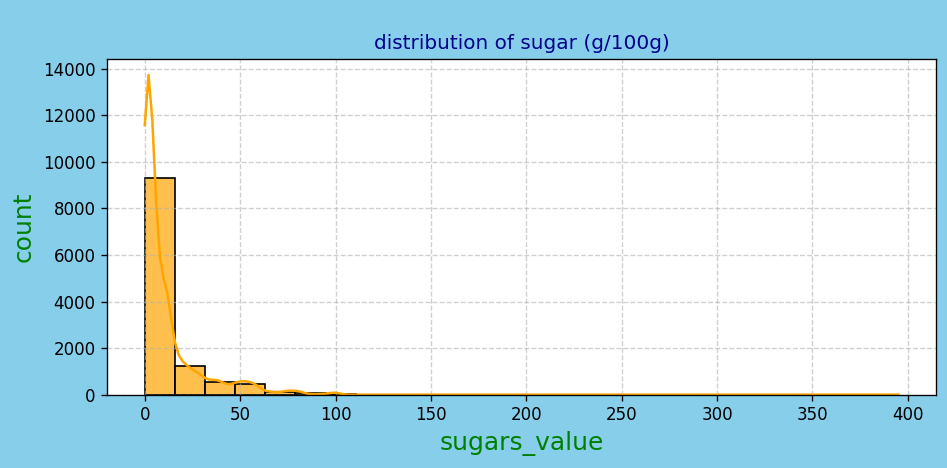

In [30]:
plt.figure(figsize = (8,4), facecolor = 'skyblue',dpi = 120,tight_layout = True)
sns.histplot(
    data = finaldf,
    x ='sugars_value',
    bins=25,
    color='orange',
    kde=True,        
    edgecolor='black',
    alpha=0.7,
    stat='count',            #  try 'density', 'probability'
    element='bars'      
    )
plt.title("\ndistribution of sugar (g/100g)",color = 'darkblue')
plt.xlabel("sugars_value", color = 'green', fontsize = 15)
plt.ylabel("count", color = 'green', fontsize = 15)
plt.grid(True, linestyle="--", alpha = 0.6)
plt.tight_layout()
plt.show()

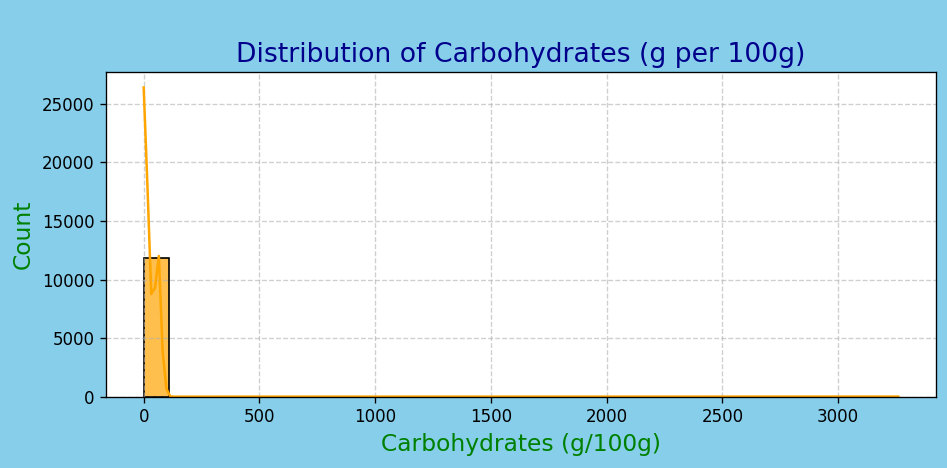

In [31]:
plt.figure(figsize=(8, 4), facecolor='skyblue', dpi=120, tight_layout=True)
sns.histplot(
    data=finaldf,
    x='carbohydrates_value',
    bins=30,
    color='orange',
    kde=True,
    edgecolor='black',
    alpha=0.7,
    stat='count',
    element='bars'
)
plt.title("\nDistribution of Carbohydrates (g per 100g)", color='darkblue', fontsize=16)
plt.xlabel("Carbohydrates (g/100g)", color='green', fontsize=14)
plt.ylabel("Count", color='green', fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)

plt.show()

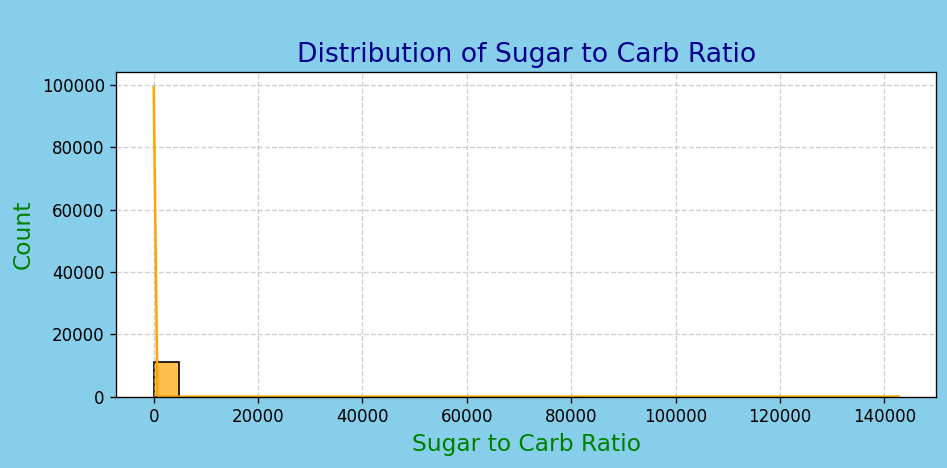

In [32]:
plt.figure(figsize=(8, 4), facecolor='skyblue', dpi=120, tight_layout=True)
sns.histplot(
    data=finaldf,
    x='sugartocarbratio',
    bins=30,
    color='orange',
    kde=True,
    edgecolor='black',
    alpha=0.7,
    stat='count',
    element='bars'
)
plt.title("\nDistribution of Sugar to Carb Ratio", color='darkblue', fontsize=16)
plt.xlabel("Sugar to Carb Ratio", color='green', fontsize=14)
plt.ylabel("Count", color='green', fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)

plt.show()

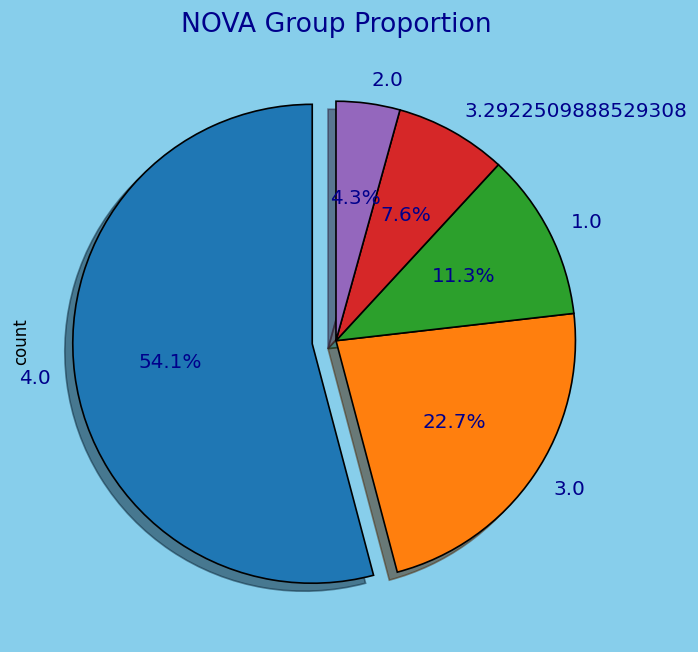

In [33]:
# nova group pie chart 
plt.figure(figsize=(6, 6), facecolor='skyblue', dpi=120)
finaldf['nova-group'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    shadow = True,
    explode = (0.1,0.0,0.0,0.0,0.0),
    wedgeprops={'edgecolor': 'black', 'linewidth': 1},
    textprops={'fontsize': 12, 'color': 'darkblue'}
)
plt.title("NOVA Group Proportion", fontsize=16, color='darkblue')
plt.tight_layout()
plt.show()


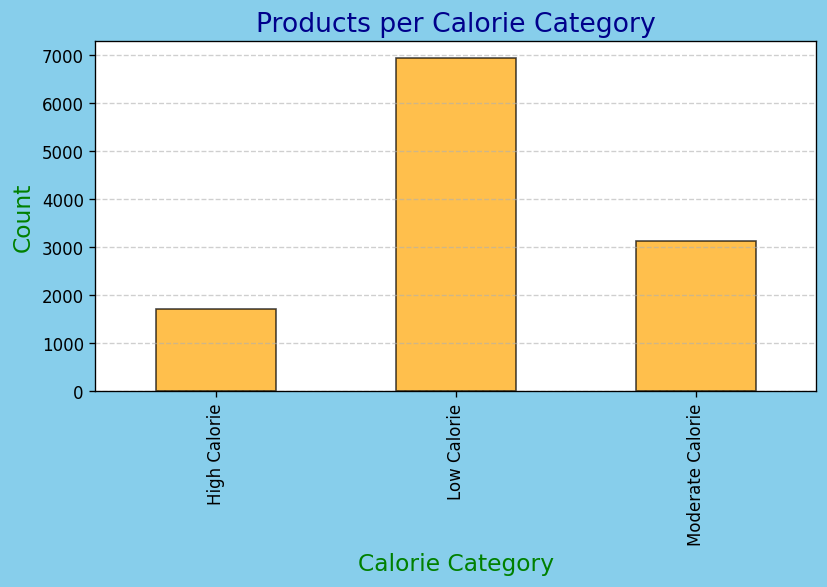

In [34]:
# Calorie category bar chart
plt.figure(figsize=(7, 5), facecolor='skyblue', dpi=120)
finaldf['caloriecategory'].value_counts().sort_index().plot(
    kind='bar',
    color='orange',
    edgecolor='black',
    alpha=0.7
)
plt.title("Products per Calorie Category", fontsize=16, color='darkblue')
plt.xlabel("Calorie Category", fontsize=14, color='green')
plt.ylabel("Count", fontsize=14, color='green')
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

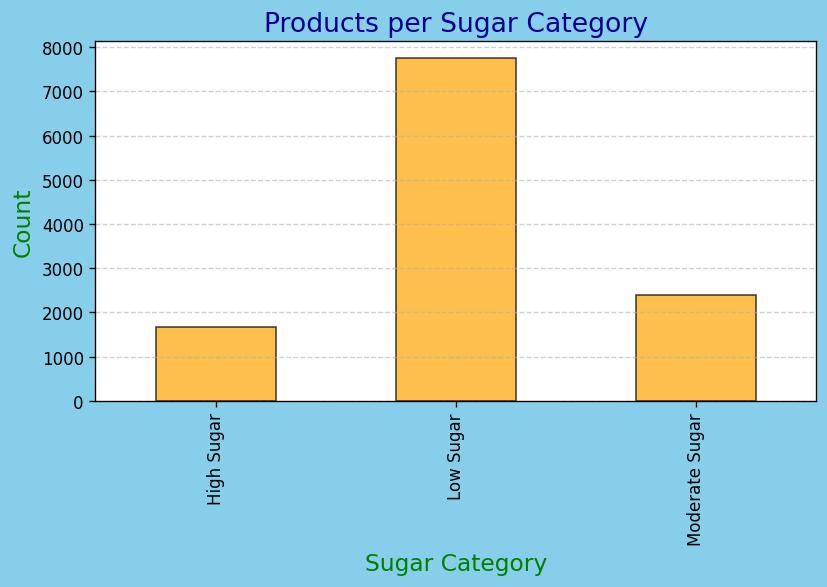

In [35]:
# Sugar category bar chart
plt.figure(figsize=(7, 5), facecolor='skyblue', dpi=120)
finaldf['sugarcategory'].value_counts().sort_index().plot(
    kind='bar',
    color='orange',
    edgecolor='black',
    alpha=0.7
)
plt.title("Products per Sugar Category", fontsize=16, color='darkblue')
plt.xlabel("Sugar Category", fontsize=14, color='green')
plt.ylabel("Count", fontsize=14, color='green')
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

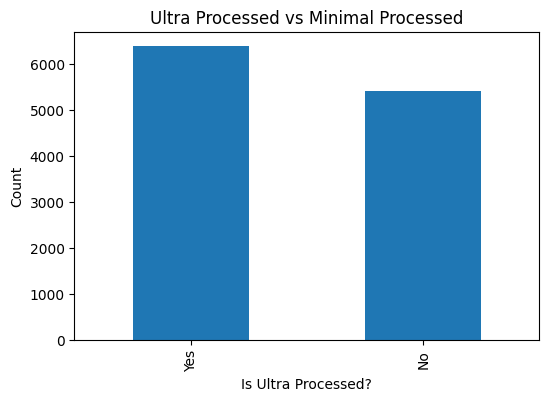

In [36]:
plt.figure(figsize=(6,4))
finaldf['isultraprocessed'].value_counts().plot(kind='bar')
plt.title("Ultra Processed vs Minimal Processed")
plt.xlabel("Is Ultra Processed?")
plt.ylabel("Count")
plt.show()

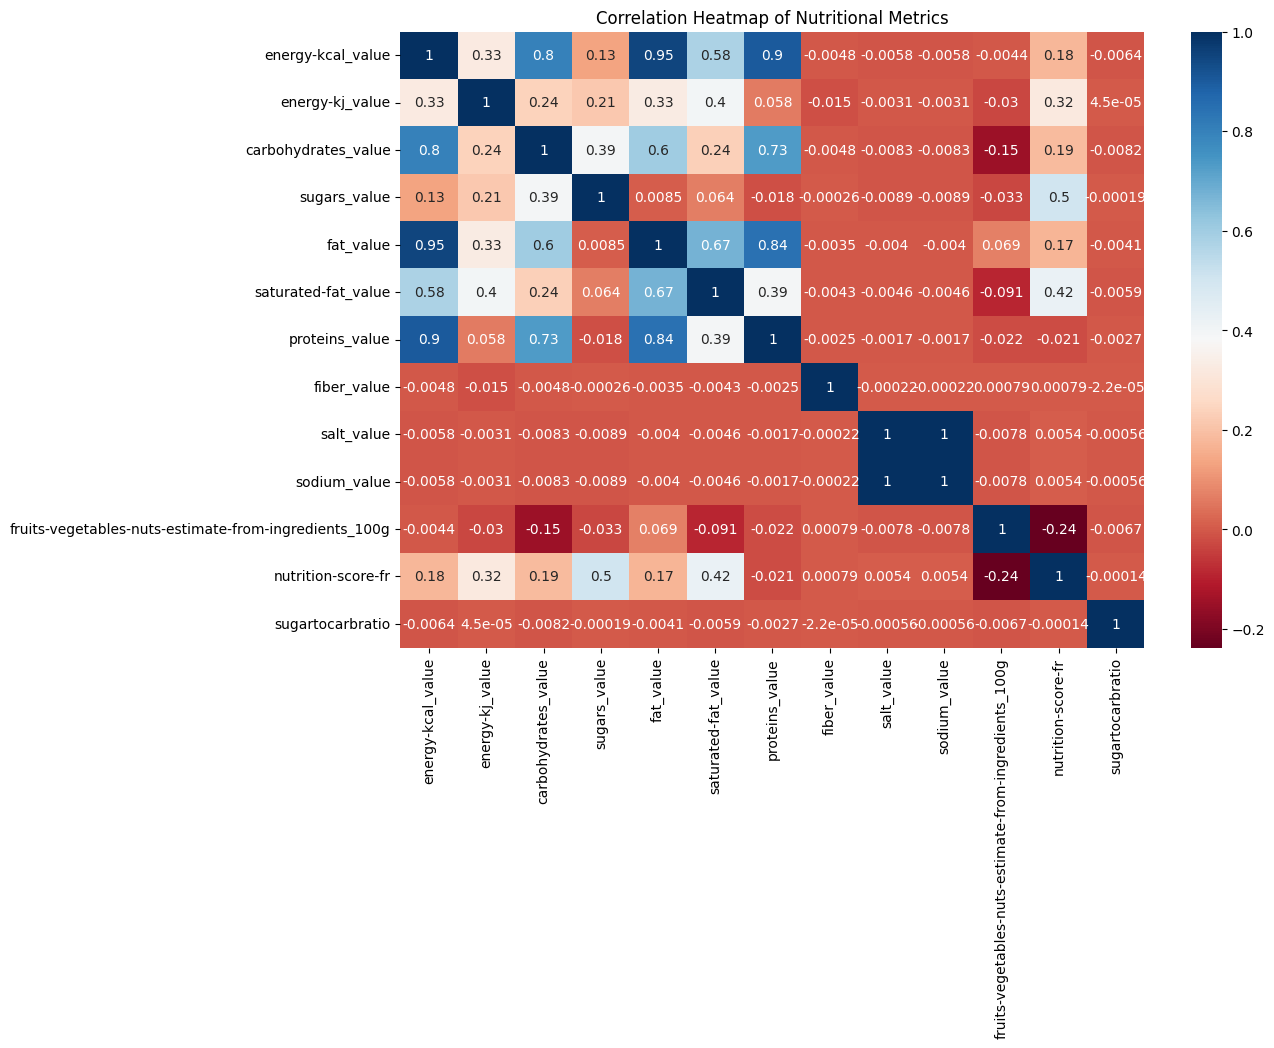

In [37]:
# Numeric columns correlation heatmap
plt.figure(figsize=(12,8))
numeric_cols = [
    'energy-kcal_value', 'energy-kj_value', 'carbohydrates_value', 'sugars_value',
    'fat_value', 'saturated-fat_value', 'proteins_value', 'fiber_value', 'salt_value',
    'sodium_value', 'fruits-vegetables-nuts-estimate-from-ingredients_100g', 'nutrition-score-fr', 'sugartocarbratio'
]
corr = finaldf[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='RdBu')
plt.title("Correlation Heatmap of Nutritional Metrics")
plt.show()

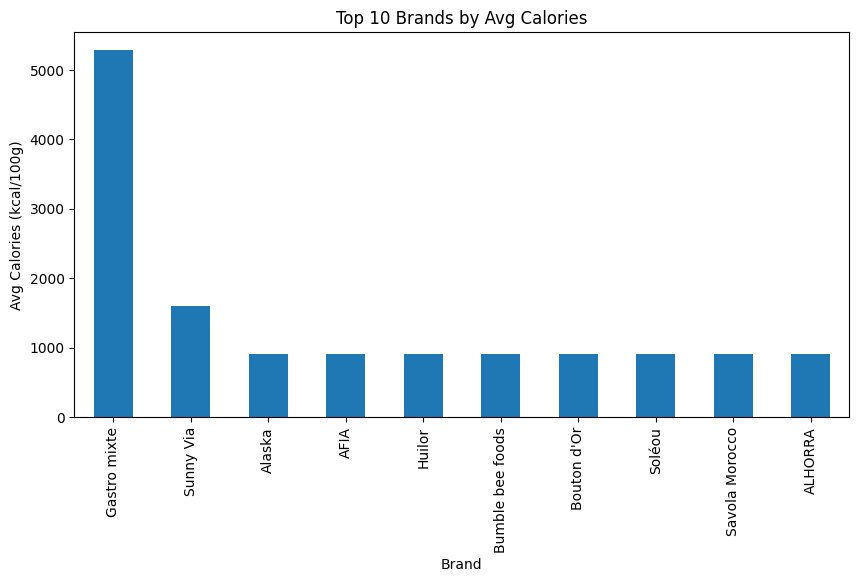

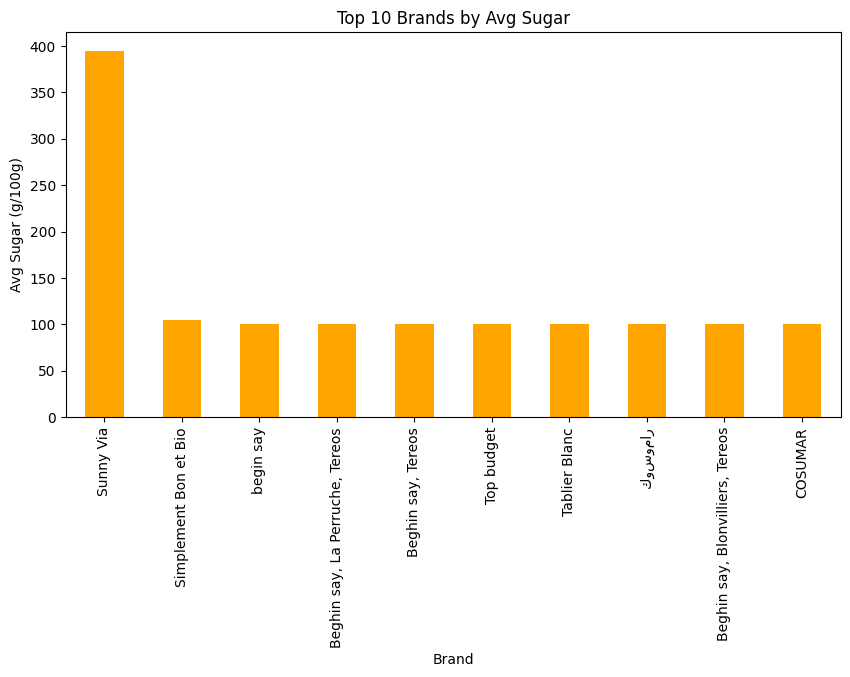

In [38]:
# Top brands by average calories & sugar
top_brands_calories = finaldf.groupby('brands')['energy-kcal_value'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
top_brands_calories.plot(kind='bar')
plt.title("Top 10 Brands by Avg Calories")
plt.ylabel("Avg Calories (kcal/100g)")
plt.xlabel("Brand")
plt.show()

top_brands_sugar = finaldf.groupby('brands')['sugars_value'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
top_brands_sugar.plot(kind='bar', color='orange')
plt.title("Top 10 Brands by Avg Sugar")
plt.ylabel("Avg Sugar (g/100g)")
plt.xlabel("Brand")
plt.show()

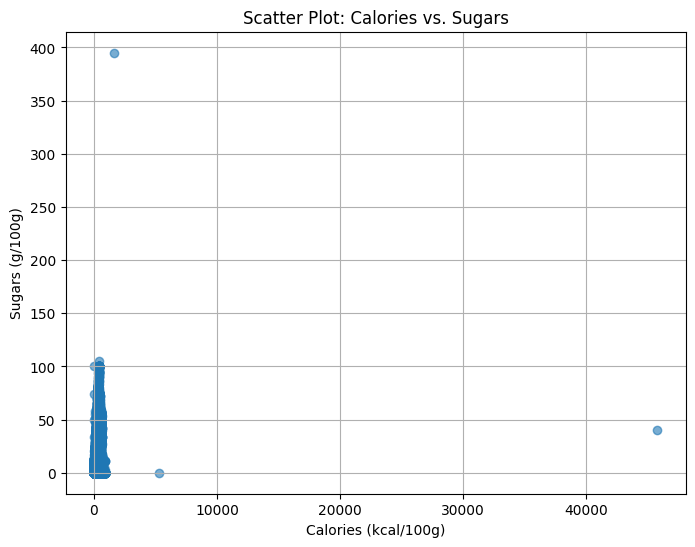

In [39]:
# ● Scatter plots to explore relationships like calories vs. sugars. 
x1 = finaldf['energy-kcal_value']
x2 = finaldf['sugars_value']       

plt.figure(figsize=(8,6))
plt.scatter(x1, x2, alpha=0.6)
plt.title("Scatter Plot: Calories vs. Sugars")
plt.xlabel("Calories (kcal/100g)")
plt.ylabel("Sugars (g/100g)")
plt.grid(True)
plt.show()

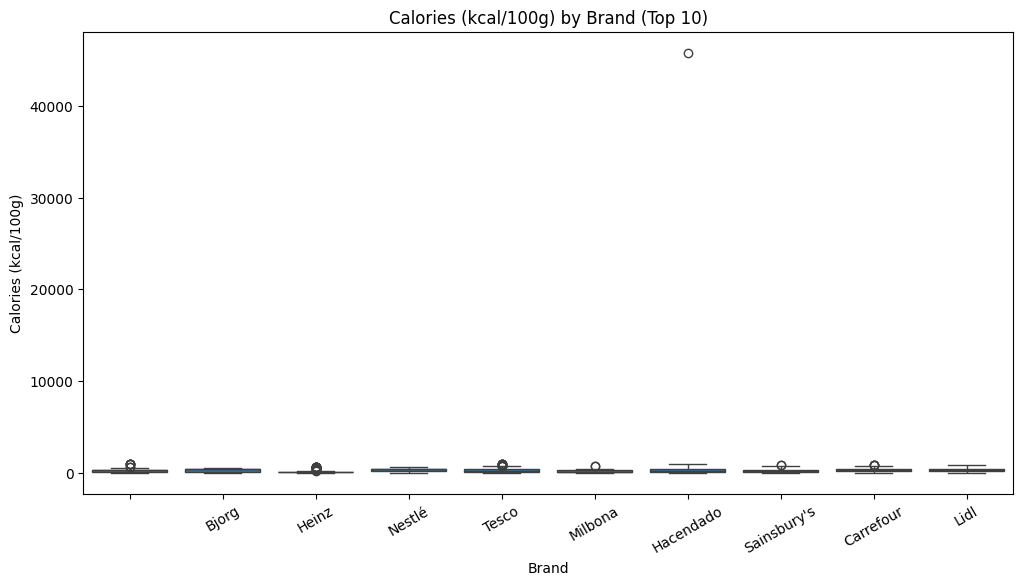

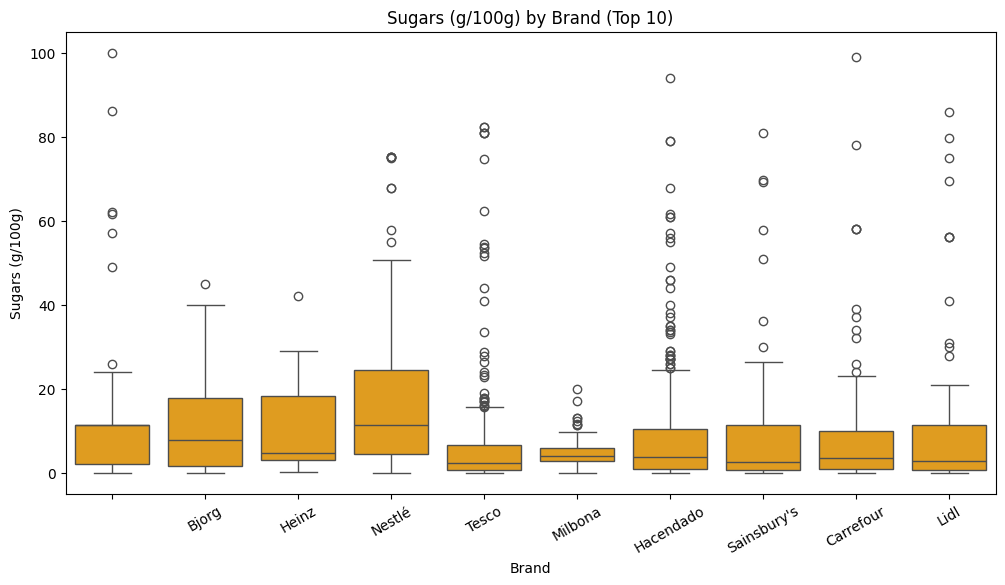

In [40]:
# ● Box plots to visualize the spread and outliers of calories or sugar across different brands.

top_brands = finaldf['brands'].value_counts().index[:10]
subset = finaldf[finaldf['brands'].isin(top_brands)]

# Box plot for calories
plt.figure(figsize=(12,6))
sns.boxplot(data=subset, x='brands', y='energy-kcal_value')
plt.title("Calories (kcal/100g) by Brand (Top 10)")
plt.xlabel("Brand")
plt.ylabel("Calories (kcal/100g)")
plt.xticks(rotation=30)
plt.show()

# Box plot for sugars 
plt.figure(figsize=(12,6))
sns.boxplot(data=subset, x='brands', y='sugars_value', color='orange')
plt.title("Sugars (g/100g) by Brand (Top 10)")
plt.xlabel("Brand")
plt.ylabel("Sugars (g/100g)")
plt.xticks(rotation=30)
plt.show()

In [41]:
finaldf.duplicated().sum()

np.int64(0)

In [42]:
import numpy as np
import mysql.connector

# Step 1: Clean data - Replace inf/-inf with NaN and fill or drop NaNs
finaldf.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaNs in numeric columns with column mean
numeric_cols = finaldf.select_dtypes(include=[np.number]).columns
finaldf[numeric_cols] = finaldf[numeric_cols].fillna(finaldf[numeric_cols].mean())

# Drop remaining NaN rows if any
finaldf.dropna(inplace=True)

# DataFrames
productinfo = finaldf[['code', 'product_name', 'brands']]
nutrientinfo = finaldf[['code', 'energy-kcal_value', 'energy-kj_value', 'carbohydrates_value',
                        'sugars_value', 'fat_value', 'saturated-fat_value',
                        'proteins_value', 'fiber_value', 'salt_value', 'sodium_value',
                        'fruits-vegetables-nuts-estimate-from-ingredients_100g', 'nutrition-score-fr', 'nova-group']]
derivedmetrics = finaldf[['code', 'sugartocarbratio', 'caloriecategory', 'sugarcategory', 'isultraprocessed']]

In [43]:
productinfo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11803 entries, 0 to 12396
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   code          11803 non-null  object
 1   product_name  11803 non-null  object
 2   brands        11803 non-null  object
dtypes: object(3)
memory usage: 368.8+ KB


In [44]:
productinfo.duplicated().sum()

np.int64(0)

In [45]:
len(finaldf)

11803

In [46]:
len(productinfo)

11803

In [68]:
len(nutrientinfo)

11803

In [69]:
len(derivedmetrics)

11803

In [61]:
import mysql.connector

In [62]:
# MySQL Connection
connection = mysql.connector.connect(
    host="localhost",
    port=3306,
    user="root",
    password="root",
    database="choco_analytics2"
)

cursor = connection.cursor()


In [63]:
# table creation
cursor.execute("""
CREATE TABLE IF NOT EXISTS product_info(
product_code VARCHAR(255) PRIMARY KEY,
    product_name TEXT,
    brand TEXT
);
""")

cursor.execute("""
CREATE TABLE IF NOT EXISTS nutrient_info (
    product_code VARCHAR(255),
    energy_kcal_value FLOAT,
    energy_kj_value FLOAT,
    carbohydrates_value FLOAT,
    sugars_value FLOAT,
    fat_value FLOAT,
    saturated_fat_value FLOAT,
    proteins_value FLOAT,
    fiber_value FLOAT,
    salt_value FLOAT,
    sodium_value FLOAT,
    fruits_vegetables_nuts_estimate_from_ingredients_100g FLOAT,
    nutrition_score_fr INT,
    nova_group INT,
    FOREIGN KEY(product_code) REFERENCES product_info(product_code)
);
""")

cursor.execute("""
CREATE TABLE IF NOT EXISTS derived_metrics (
    product_code VARCHAR(255),
    sugar_to_carb_ratio FLOAT,
    calorie_category TEXT,
    sugar_category TEXT,
    is_ultra_processed TEXT,
    FOREIGN KEY(product_code) REFERENCES product_info(product_code)
);
""")

connection.commit()


In [64]:
cursor.execute("DELETE FROM product_info;")
connection.commit()

for index, row in productinfo.iterrows():
    sql = "INSERT INTO product_info (product_code, product_name, brand) VALUES (%s, %s, %s)"
    values = (row['code'], row['product_name'], row['brands'])
    cursor.execute(sql, values)

connection.commit()


In [66]:

for i, row in nutrientinfo.iterrows():
    cursor.execute(
        "INSERT IGNORE INTO nutrient_info (product_code, energy_kcal_value, energy_kj_value, carbohydrates_value, sugars_value, fat_value, saturated_fat_value, proteins_value, fiber_value, salt_value, sodium_value, fruits_vegetables_nuts_estimate_from_ingredients_100g, nutrition_score_fr, nova_group) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)",
        (
            row['code'], row['energy-kcal_value'], row['energy-kj_value'], row['carbohydrates_value'],
            row['sugars_value'], row['fat_value'], row['saturated-fat_value'], row['proteins_value'],
            row['fiber_value'], row['salt_value'], row['sodium_value'],
            row['fruits-vegetables-nuts-estimate-from-ingredients_100g'],
            row['nutrition-score-fr'], row['nova-group']
        )
    )

for i, row in derivedmetrics.iterrows():
    cursor.execute(
        "INSERT IGNORE INTO derived_metrics (product_code, sugar_to_carb_ratio, calorie_category, sugar_category, is_ultra_processed) VALUES (%s, %s, %s, %s, %s)",
        (row['code'], row['sugartocarbratio'], row['caloriecategory'], row['sugarcategory'], row['isultraprocessed'])
    )
print("Data Inserted Successfully")
connection.commit()
cursor.close()
connection.close()


Data Inserted Successfully
